### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [ ]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

## Missing values
Let's start with finding out the percentage of values missing

In [ ]:
# Investigate the dataset for missing or problematic data

# Calculate the number and percentage of missing values in each column
missing_data = data.isnull().sum()
missing_data_percentage = (missing_data / len(data)) * 100

# Create a DataFrame to display the missing data information
missing_data_df = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_data_percentage
})

# Display the list of missing values in descending order, and filter for non-zero missing percentages
missing_data_df.query('Percentage > 0').sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage
car,12576,99.148534
CoffeeHouse,217,1.710817
Restaurant20To50,189,1.490066
CarryAway,151,1.190476
RestaurantLessThan20,130,1.024913
Bar,107,0.843582


### Missing Data Analysis
Here is a summary of the columns with missing values and their percentages:

1. car: 99.15% missing
2. CoffeeHouse: 1.71% missing
3. Restaurant20To50: 1.49% missing
4. CarryAway: 1.19% missing
5. RestaurantLessThan20: 1.02% missing
6. Bar: 0.84% missing

The rest of the columns do not have any missing values.

#### Observations
The car column has an extremely high percentage of missing values (99.15%), making it unsuitable for analysis.
Other columns have less than 2% missing data, which can be handled using various imputation techniques or by removing the rows.

#### Next Steps
- Remove the car column from the dataset due to the high percentage of missing values.
- Impute or remove missing values in the columns CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20, and Bar.

--------------------------------------------------------------------------------

3. Decide what to do about your missing data -- drop, replace, other...

## Handling Missing Data
Based on the missing data analysis, we will handle the missing data as follows:

1. Drop the car column due to its high percentage of missing values (99.15%).
2. Impute missing values for the other columns with missing data using appropriate strategies.

#### Imputation Strategies:
- For categorical variables (CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20, Bar), we can use the most frequent value (mode) to replace the missing values.

#### Steps:
1. Drop the car column.
2. Impute missing values in the remaining columns using the mode.

Let's implement these steps.

In [ ]:
# Drop the 'car' column
data_cleaned = data.drop(columns=['car'])

# Impute missing values for categorical columns using the most frequent value (mode)
for column in ['CoffeeHouse', 'Restaurant20To50', 'CarryAway', 'RestaurantLessThan20', 'Bar']:
    mode_value = data_cleaned[column].mode()[0]
    data_cleaned[column].fillna(mode_value, inplace=True)

# Verify that there are no missing values left
missing_data_cleaned = data_cleaned.isnull().sum()
missing_data_cleaned_df = pd.DataFrame({
    'Missing Values': missing_data_cleaned,
    'Percentage': (missing_data_cleaned / len(data_cleaned)) * 100
})

missing_data_cleaned_df.query('Percentage > 0').sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage


#### Missing Data Handling Completed
The missing data has been handled as follows:

1. The car column was dropped due to its high percentage of missing values.
2. Missing values in the columns CoffeeHouse, Restaurant20To50, CarryAway, RestaurantLessThan20, and Bar were imputed using the most frequent value (mode).
   
Now, there are no missing values in the dataset.

--------------------------------------------------------------------------------

4. What proportion of the total observations chose to accept the coupon?



#### Acceptance Rate for Coupons

In [ ]:
# Calculate the proportion of observations that chose to accept the coupon (Y = 1)
acceptance_rate = data_cleaned['Y'].mean()

acceptance_rate

0.5684326710816777

The proportion of total observations that chose to accept the coupon is approximately **56.84%**. This means that a little over half of the participants accepted the coupon.

--------------------------------------------------------------------------------

5. Use a bar plot to visualize the `coupon` column.

### Distribution of Coupon Types

In [ ]:
import plotly.express as px

# Create a bar plot for the 'coupon' column
coupon_counts = data_cleaned['coupon'].value_counts().reset_index()
coupon_counts.columns = ['Coupon Type', 'Count']

fig = px.bar(coupon_counts, x='Coupon Type', y='Count', title='Distribution of Coupon Types', color='Coupon Type')

# Customize the layout
fig.update_layout(
    xaxis=dict(gridcolor='lightgrey'),
    yaxis=dict(gridcolor='lightgrey'),
    plot_bgcolor='white',
    title_x=0.5,   # center the title a bit
    showlegend=False,    # Hide the legend
    height=600,
    width=600
)

# Display the plot
fig.show()


Above is the bar plot showing the distribution of different coupon types. It illustrates the frequency of each coupon type in the dataset.

#### Observations:
1. The most frequent coupon type is for "Coffee House". But all "Restaurants" counted together will be the most frequent.
2. The least frequent coupon type is for "Bar" if all Restaurants are counted together.

--------------------------------------------------------------------------------

6. Use a histogram to visualize the temperature column.

In [ ]:
# Calculate mean and median
mean_temp = data_cleaned['temperature'].mean()
median_temp = data_cleaned['temperature'].median()

# Create a histogram with marginal plot for the 'temperature' column. Use suitable bins to show proper individual bars.
fig = px.histogram(data_cleaned, nbins=80, color='temperature', x='temperature',
                   title='Distribution of Temperature',
                   labels={'temperature': 'Temperature (Fahrenheit)'}
                   )

# Add mean and median lines
fig.add_vline(x=mean_temp, line=dict(color='blue', dash='dash'))
fig.add_vline(x=median_temp, line=dict(color='green', dash='dash'))

# Add text annotations for mean and median values
fig.add_annotation(x=mean_temp, y=1, text=f'Mean: {mean_temp:.2f}', bgcolor='blue', font=dict(color='white'))
fig.add_annotation(x=median_temp, y=1, text=f'Median: {median_temp:.2f}', bgcolor='green', font=dict(color='white'))

# Update the plot with some visual changes
fig.update_layout(
    xaxis_title='Temperature (Fahrenheit)',
    yaxis_title='Frequency',
    template='plotly_white',
    height=600,
    width=900
)

fig.show()

The data includes three distinct temperature values: 30°F, 55°F, and 80°F. Added Mean and Median to add a little more insight.

#### --------------------------------------------------------------------------------------------------------------------------------------

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [ ]:
# Create a new DataFrame that contains only the rows with bar coupons
bar_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Bar']

bar_coupons_df.head()
# bar_coupons_df.shape  # (2017, 25)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1




A new DataFrame has been created containing only the rows with bar-related coupons. Here is a brief overview of this new DataFrame:

Total entries: `2,017`
Total columns: `25` (all the same columns as the original dataset, except for the 'car' column which was dropped earlier)

2. What proportion of bar coupons were accepted?


In [ ]:
# Calculate the proportion of bar coupons that were accepted (Y = 1)
bar_acceptance_rate = bar_coupons_df['Y'].mean()

bar_acceptance_rate

0.41001487357461575

In [ ]:
# Count the number of accepted and rejected coupons
accepted_count = bar_coupons_df['Y'].sum()
rejected_count = len(bar_coupons_df) - accepted_count

# Create a DataFrame for the pie chart
pie_data = pd.DataFrame({
    'Category': ['Accepted', 'Rejected'],
    'Count': [accepted_count, rejected_count]
})

# Create the 3D pie chart with customizations
fig = px.pie(pie_data,
             values='Count',
             names='Category',
             title='Bar Coupon Acceptance Rate',
             color='Category',
             hole=0.3,  # Blow up the pie chart for separation
            )

# Update layout for light grey background, size, and 3D effect
fig.update_layout(
    plot_bgcolor='lightgrey',  # Set light grey background
    paper_bgcolor='lightgrey',  # Set light grey plot area
    height=600,
    width=600,
    scene=dict(
        bgcolor='black'  # Set light grey background for 3D scene
    )
)

fig.show()



The proportion of bar coupons that were accepted is approximately `41%`. This indicates that less than half of the bar coupons were accepted by the participants.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [ ]:
# Create a new column 'bar_visits' to categorize the frequency of bar visits
bar_coupons_df.loc[bar_coupons_df.query("Bar in ['never', 'less1', '1~3']").index, 'bar_visits'] = '3 or fewer'
bar_coupons_df.loc[bar_coupons_df.query("Bar not in ['never', 'less1', '1~3']").index, 'bar_visits'] = 'more than 3'

# Calculate acceptance rates based on the new 'bar_visits' column
acceptance_rate_bar_visits = bar_coupons_df.groupby('bar_visits')[['Y']].mean()

acceptance_rate_bar_visits

,Y
bar_visits,
3 or fewer,0.370737
more than 3,0.768844


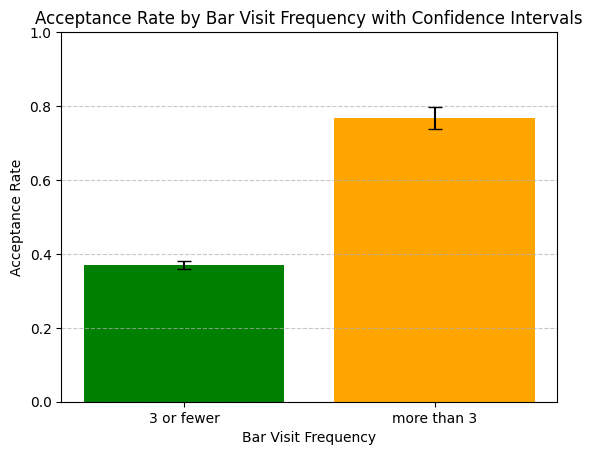

In [ ]:
# acceptance_rate_bar_visits.reset_index(inplace=True)

# Data for plotting
categories = acceptance_rate_bar_visits['bar_visits']
acceptance_rates = acceptance_rate_bar_visits['Y']

# Calculate confidence intervals
confidence_intervals = bar_coupons_df.groupby('bar_visits')['Y'].agg(lambda x: np.std(x) / np.sqrt(len(x)))

# Create the bar chart with error bars
plt.bar(categories, acceptance_rates, yerr=confidence_intervals, capsize=5, color=['green', 'orange'])

# Customize the plot
plt.title('Acceptance Rate by Bar Visit Frequency')
plt.xlabel('Bar Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.title('Acceptance Rate by Bar Visit Frequency with Confidence Intervals')
plt.ylim(0, 1)  # Setting the y-axis limit from 0 to 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The acceptance rates for bar coupons based on the frequency of bar visits are as follows:

- 3 or fewer visits per month: `37.07%`
- More than 3 visits per month: `76.88%`

#### Observations
Participants who visit bars more than 3 times a month are significantly more likely to accept bar coupons compared to those who visit bars 3 or fewer times a month.




4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [ ]:
# Create a new column to categorize age groups
bar_coupons_df.loc[bar_coupons_df.query("age not in ['21', 'below21']").index, 'age_group'] = 'over 25'
bar_coupons_df.loc[bar_coupons_df.query("age in ['21', 'below21']").index, 'age_group'] = '25 or under'

# Filter the dataset for drivers who go to a bar more than once a month and are over the age of 25
filtered_df = bar_coupons_df.query("Bar in ['1~3', '4~8', 'gt8'] and age_group == 'over 25'")

# Calculate acceptance rates for the filtered group and all others
acceptance_rate_filtered = filtered_df['Y'].mean()
acceptance_rate_all_others = bar_coupons_df.query("not (Bar in ['1~3', '4~8', 'gt8'] and age_group == 'over 25')")['Y'].mean()

acceptance_rate_filtered*100, acceptance_rate_all_others*100

(69.52380952380952, 33.500313087038194)

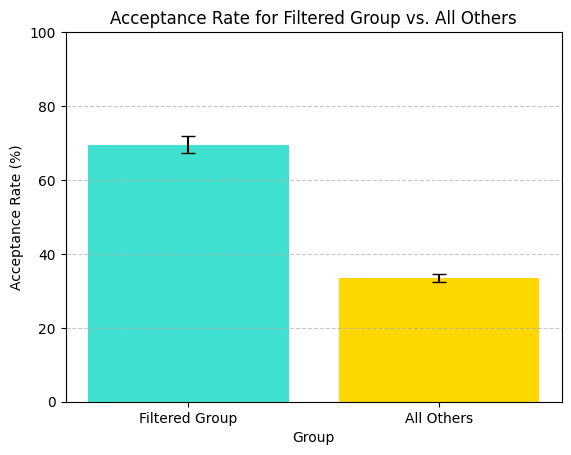

In [ ]:
# acceptance_rate_bar_visits.reset_index(inplace=True)
# Data for plotting
categories = ['Filtered Group', 'All Others']
acceptance_rates = [acceptance_rate_filtered * 100, acceptance_rate_all_others * 100]

# Calculate confidence intervals for the acceptance rates
confidence_interval_filtered = np.std(filtered_df['Y']) / np.sqrt(len(filtered_df)) * 100
confidence_interval_all_others = np.std(bar_coupons_df.query("not (Bar in ['1~3', '4~8', 'gt8'] and age_group == 'over 25')")['Y']) / np.sqrt(len(bar_coupons_df.query("not (Bar in ['1~3', '4~8', 'gt8'] and age_group == 'over 25')"))) * 100
confidence_intervals = [confidence_interval_filtered, confidence_interval_all_others]

# Create the bar chart with error bars
plt.bar(categories, acceptance_rates, yerr=confidence_intervals, capsize=5, color=['turquoise', 'gold'])
plt.xlabel('Group')
plt.ylabel('Acceptance Rate (%)')
plt.title('Acceptance Rate for Filtered Group vs. All Others')
plt.ylim(0, 100)  # Setting the y-axis limit from 0 to 100
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The acceptance rates for bar coupons based on the specified criteria are as follows:

- Drivers who go to a bar more than once a month and are over the age of 25: Approximately `69.52%`
- All other drivers: Approximately `33.50%`
  
#### Observation
Drivers who frequent bars more than once a month and are over the age of 25 are relatively more likely to accept bar coupons compared to all other drivers.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [ ]:
# Define the filtering conditions
condition_bar_visits = bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])
condition_not_kid = bar_coupons_df['passanger'] != 'Kid(s)'
condition_not_farming_fishing_forestry = bar_coupons_df['occupation'] != 'Farming Fishing & Forestry'

# Combine the conditions into a single mask
mask = condition_bar_visits & condition_not_kid & condition_not_farming_fishing_forestry

# Apply the mask to filter the DataFrame
filtered_df = bar_coupons_df[mask]

# Calculate acceptance rates for the filtered group and all others
acceptance_rate_filtered = filtered_df['Y'].mean()
acceptance_rate_all_others = bar_coupons_df[~mask]['Y'].mean()

# Output the acceptance rates as percentages
acceptance_rate_filtered * 100, acceptance_rate_all_others * 100

(71.32486388384754, 29.6043656207367)

The acceptance rates for bar coupons based on the specified criteria are as follows:

- Drivers who go to bars more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry: Approximately `71.32%`
- All other drivers: Approximately `29.60%`

#### Observation
Drivers who frequently visit bars, have passengers other than kids, and work in occupations other than farming, fishing, or forestry are significantly more likely to accept bar coupons compared to all other drivers.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [ ]:
# Create a new column to categorize income groups
bar_coupons_df.loc[:, 'income_group'] = '50K or more'
bar_coupons_df.loc[bar_coupons_df['income'].isin(['less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']), 'income_group'] = 'less than 50K'

# Define the filtering conditions
condition1 = (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['passanger'] != 'Kid(s)') & (bar_coupons_df['maritalStatus'] != 'Widowed')
condition2 = (bar_coupons_df['Bar'].isin(['1~3', '4~8', 'gt8'])) & (bar_coupons_df['age'].isin(['below21', '21', '26', '30']))
condition3 = (bar_coupons_df['RestaurantLessThan20'].isin(['gt8', '4~8'])) & (bar_coupons_df['income_group'] == 'less than 50K')

# Combine the conditions into a single mask
mask = condition1 | condition2 | condition3

# Apply the mask to filter the DataFrame
filtered_df3 = bar_coupons_df[mask]

# Calculate acceptance rates for the filtered group and all others
acceptance_rate_filtered3 = filtered_df3['Y'].mean()
acceptance_rate_all_others3 = bar_coupons_df[~mask]['Y'].mean()

# Output the acceptance rates as percentages
acceptance_rate_filtered3 * 100, acceptance_rate_all_others3 * 100

(61.241379310344826, 29.64396284829721)

The acceptance rates for bar coupons based on the specified criteria are as follows:

* Drivers who meet any of the following conditions:
    - Go to bars more than once a month, had passengers that were not a kid, and were not widowed
    - Go to bars more than once a month and are under the age of 30
    - Go to cheap restaurants more than 4 times a month and have an income of less than 50K
    - Acceptance Rate: Approximately `61.24%`
* All other drivers:
    - Acceptance Rate: Approximately `29.64%`

#### Observation
Drivers who meet any of the specified conditions are more likely to accept bar coupons compared to all other drivers.

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Hypotheses About Drivers Who Accepted Bar Coupons

Based on the observations, we can formulate the following hypotheses about the drivers who accepted bar coupons:

1. **Frequent Bar Visitors**:
Drivers who visit bars more than once a month are significantly more likely to accept bar coupons. This indicates a higher interest or comfort level with bar environments, making them more receptive to related offers.
     

2. **Age Influence**:
Younger drivers, particularly those under the age of 30, show a higher acceptance rate for bar coupons. This could be due to a lifestyle that includes more social outings or a higher propensity for spontaneous activities.
     

3. **Passenger Influence**:
Drivers with passengers other than kids are more likely to accept bar coupons. This suggests that having adult or peer passengers may encourage social activities like visiting bars.
     

4. **Marital Status**:
Drivers who are not widowed show a higher acceptance rate for bar coupons. This could imply that single, married, or partnered individuals are more inclined towards social activities compared to widowed individuals.
     

5. **Income and Dining Habits**:
Drivers who frequent inexpensive restaurants more than four times a month and have an income of less than 50K are also more likely to accept bar coupons. This suggests that individuals with regular dining out habits and moderate income levels may be more open to taking advantage of discounts or offers.
     

### Additional Factors
- **Occupation**: Certain occupations might have social or cultural tendencies that align with higher bar visits, making those individuals more likely to accept bar-related coupons.
- **Time of Day and Weather**: These contextual factors might further influence the likelihood of accepting bar coupons, though they were not specifically analyzed in this context.

### Conclusion
The drivers who are most likely to accept bar coupons are those who are frequent bar-goers, younger, have adult passengers, are not widowed, and have regular dining out habits with moderate income levels. These insights can help in targeting promotional efforts more effectively towards drivers who fit these profiles.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

## Independent Investigation: Analyzing Coffee House Coupons
Let's explore the coffee house coupons to determine the characteristics of passengers who accept these coupons.

### Steps:

1. Create a new DataFrame containing only the coffee house coupons.
2. Calculate the acceptance rate for coffee house coupons.
3. Analyze the influence of different variables (e.g., age, marital status, income, occupation) on the acceptance of coffee house coupons.
4. Compare acceptance rates based on different characteristics.

Let's start by creating a new DataFrame for coffee house coupons and calculating the overall acceptance rate.

In [ ]:
# Create a new DataFrame that contains only the rows with coffee house coupons
coffee_coupons_df = data_cleaned[data_cleaned['coupon'] == 'Coffee House']

# Calculate the overall acceptance rate for coffee house coupons
coffee_acceptance_rate = coffee_coupons_df['Y'].mean()

coffee_coupons_info = coffee_coupons_df.info()
coffee_coupons_head = coffee_coupons_df.head()

coffee_acceptance_rate, coffee_coupons_info, coffee_coupons_head


<class 'pandas.core.frame.DataFrame'>
Index: 3996 entries, 1 to 12681
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  Bar                   3996 non-null   object
 15  CoffeeHouse           3996 non-null   obje

(0.49924924924924924,
 None,
         destination  passanger weather  temperature  time        coupon  \
 1   No Urgent Place  Friend(s)   Sunny           80  10AM  Coffee House   
 3   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
 4   No Urgent Place  Friend(s)   Sunny           80   2PM  Coffee House   
 12  No Urgent Place     Kid(s)   Sunny           55   6PM  Coffee House   
 15             Home      Alone   Sunny           80   6PM  Coffee House   
 
    expiration  gender age      maritalStatus  ...  CoffeeHouse CarryAway  \
 1          2h  Female  21  Unmarried partner  ...        never       1~3   
 3          2h  Female  21  Unmarried partner  ...        never       1~3   
 4          1d  Female  21  Unmarried partner  ...        never       1~3   
 12         2h  Female  21  Unmarried partner  ...        never       1~3   
 15         2h  Female  21  Unmarried partner  ...        never       1~3   
 
    RestaurantLessThan20 Restaurant20To50 toCoupo

## Coffee House Coupons DataFrame
A new DataFrame has been created containing only the rows with coffee house coupons. Here is a brief overview of this new DataFrame:

Total entries: `3,996`
Total columns: `25`

Overall Acceptance Rate for Coffee House Coupons
Acceptance Rate: ~ `49.92%`

**Next Steps**

Analyze the influence of different variables: We'll analyze variables like age, marital status, income, and occupation to understand their influence on the acceptance of coffee house coupons.

Compare acceptance rates based on different characteristics: We'll compare acceptance rates for different groups within these variables.


Let's start by analyzing the acceptance rate based on the age of the driver.

In [ ]:
# Calculate acceptance rates based on age groups
acceptance_rate_age = coffee_coupons_df.groupby('age')['Y'].mean().sort_index()

acceptance_rate_age


age
21         0.524349
26         0.514828
31         0.476726
36         0.467662
41         0.501538
46         0.513636
50plus     0.420183
below21    0.696774
Name: Y, dtype: float64

## Acceptance Rates by Age Group
Here are the acceptance rates for coffee house coupons based on age groups:

Below 21: ~ `69.68%`

21: ~ `52.43%`

26: ~ `51.48%`

31: ~ `47.67%`

36: ~ `46.77%`

41: ~ `50.15%`

46: ~ `51.36%`

50+: ~ `42.02%`


## Observations
Drivers under the age of 21 have the highest acceptance rate for coffee house coupons. The acceptance rate generally decreases with age, with a noticeable drop for drivers aged 50 and above.


Next, let's analyze the acceptance rate based on the marital status of the driver.

In [ ]:
# Calculate acceptance rates based on marital status
acceptance_rate_marital_status = coffee_coupons_df.groupby('maritalStatus')['Y'].mean().sort_index()

acceptance_rate_marital_status


maritalStatus
Divorced             0.523179
Married partner      0.493186
Single               0.516129
Unmarried partner    0.478382
Widowed              0.351351
Name: Y, dtype: float64

## Acceptance Rates by Marital Status
Here are the acceptance rates for coffee house coupons based on marital status:

Divorced: ~ `52.32%`

Married partner: ~ `49.32%`

Single: ~ `51.61%`

Unmarried partner: ~ `47.84%`

Widowed: ~ `35.14%`

## Observations
Divorced and single drivers have higher acceptance rates for coffee house coupons. Widowed drivers have the lowest acceptance rate.

Next, let's analyze the acceptance rate based on the income of the driver.

In [ ]:
# Calculate acceptance rates based on income groups
acceptance_rate_income = coffee_coupons_df.groupby('income')['Y'].mean().sort_index()

acceptance_rate_income


income
$100000 or More     0.494382
$12500 - $24999     0.540404
$25000 - $37499     0.473438
$37500 - $49999     0.542373
$50000 - $62499     0.503650
$62500 - $74999     0.436364
$75000 - $87499     0.296610
$87500 - $99999     0.557196
Less than $12500    0.551948
Name: Y, dtype: float64

## Acceptance Rates by Income Group
### Here are the acceptance rates for coffee house coupons based on income groups:


`Less than $12,500`: ~ `55.19%`

`$12,500 - $24,999`: ~ `54.04%`

`$25,000 - $37,499`: ~ `47.34%`

`$37,500 - $49,999`: ~ `54.24%`

`$50,000 - $62,499`: ~ `50.37%`

`$62,500 - $74,999`: ~ `43.64%`

`$75,000 - $87,499`: ~ `29.66%`

`$87,500 - $99,999`: ~ `55.72%`

`$100,000 or More`: ~ `49.44%`


## Observations
Drivers with incomes in the ranges of `less than $12,500`, `$12,500 - $24,999`, `$37,500 - $49,999`, and `$87,500 - $99,999` have higher acceptance rates for coffee house coupons. Drivers with incomes between `$75,000 and $87,499` have the lowest acceptance rate.

Next, let's analyze the acceptance rate based on the occupation of the driver.

In [ ]:
# Calculate acceptance rates based on occupation
acceptance_rate_occupation = coffee_coupons_df.groupby('occupation')['Y'].mean().sort_index()

acceptance_rate_occupation


occupation
Architecture & Engineering                   0.555556
Arts Design Entertainment Sports & Media     0.507177
Building & Grounds Cleaning & Maintenance    0.727273
Business & Financial                         0.479452
Community & Social Services                  0.351351
Computer & Mathematical                      0.503341
Construction & Extraction                    0.478261
Education&Training&Library                   0.435811
Farming Fishing & Forestry                   0.545455
Food Preparation & Serving Related           0.445783
Healthcare Practitioners & Technical         0.743243
Healthcare Support                           0.615385
Installation Maintenance & Repair            0.568182
Legal                                        0.376812
Life Physical Social Science                 0.475410
Management                                   0.456376
Office & Administrative Support              0.431472
Personal Care & Service                      0.500000
Production Occupa

## Acceptance Rates by Occupation
### Here are the acceptance rates for coffee house coupons based on occupation:

Building & Grounds Cleaning & Maintenance: ~ `72.73%`

Healthcare Practitioners & Technical: ~ `74.32%`

Healthcare Support: ~ `61.54%`

Student: ~ `62.53%`

Transportation & Material Moving: ~ `61.84%`

Unemployed: ~ `54.21%`

Architecture & Engineering: ~ `55.56%`

Farming Fishing & Forestry: ~ `54.55%`

--

**Lower acceptance rates are observed in**:

Sales & Related: ~ `39.15%`

Legal: ~ `37.68%`

Production Occupations: ~ `35.71%`

Community & Social Services: ~ `35.14%`

-

### Observations
Drivers in healthcare-related fields, building and grounds maintenance, students, and those in transportation-related jobs are more likely to accept coffee house coupons.
Drivers in legal, sales, production, and community/social service occupations are less likely to accept these coupons.

## Summary
From the above analysis, we can see that the acceptance rates for coffee house coupons vary across different age groups, marital statuses, income levels, and occupations. Younger drivers, drivers with moderate income, and those in specific occupations such as healthcare and maintenance show higher acceptance rates.


